In [88]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


([], [])

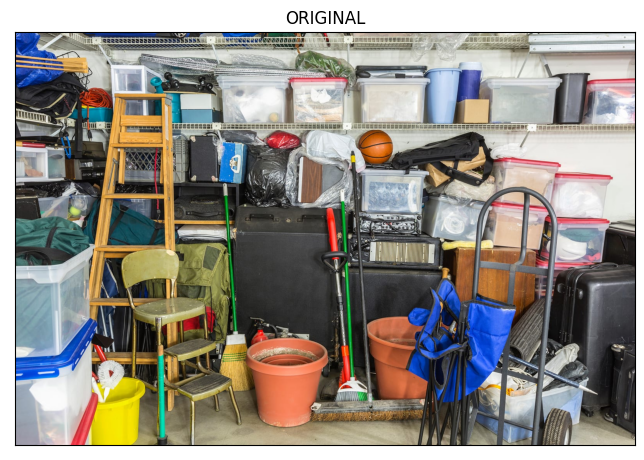

In [89]:
img = cv.imread(cv.samples.findFile('bigstock-Messy-garage.jpg'))

plt.figure(figsize=(8,8))
plt.imshow(img[:,:,::-1])
plt.title('ORIGINAL'); plt.xticks([]); plt.yticks([])

Shape of the image (1067, 1600, 3)


([], [])

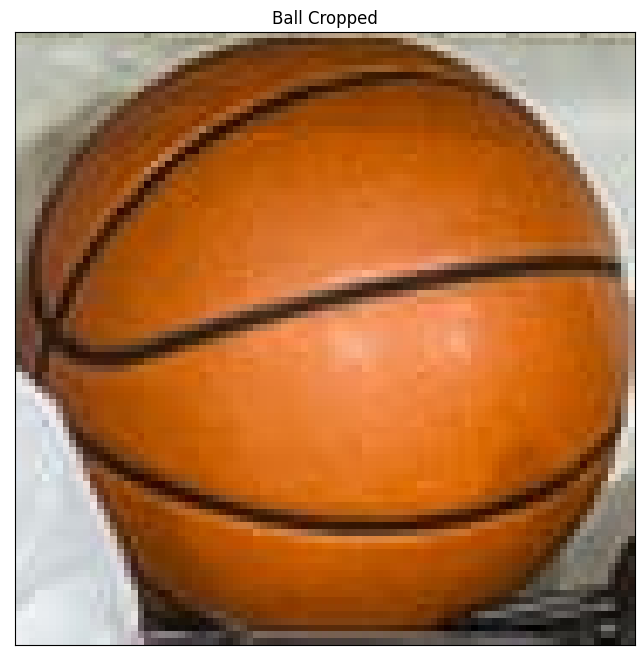

In [90]:
# Shape of the image
print("Shape of the image", img.shape)

# [rows, columns]
crop_ball = img[254:344, 885:976, ::-1]

#plot image
plt.figure(figsize=(8, 8))
plt.imshow(crop_ball)
plt.title('Ball Cropped')
plt.xticks([])
plt.yticks([])


(<AxesSubplot: title={'center': 'SIFT Keypoints with Size and Orientation'}>,
 Text(0.5, 1.0, 'SIFT Keypoints with Size and Orientation'),
 ([], []),
 ([], []))

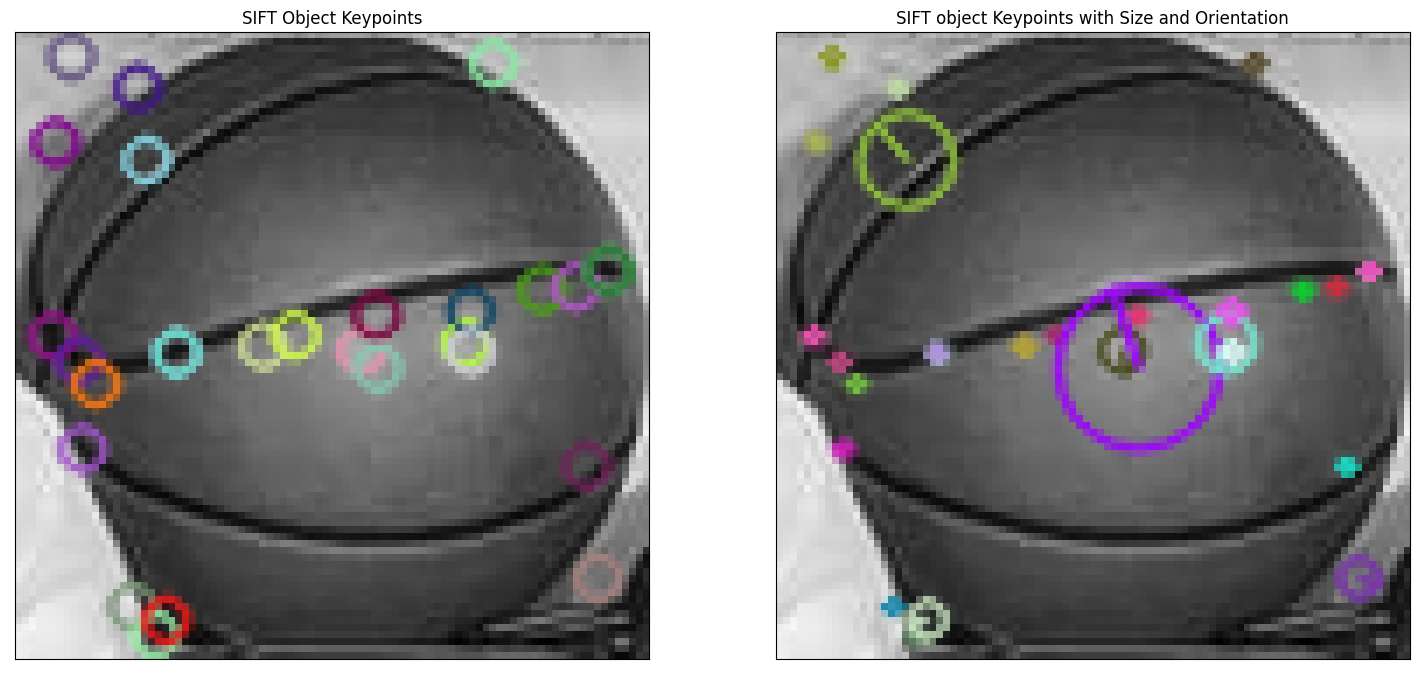

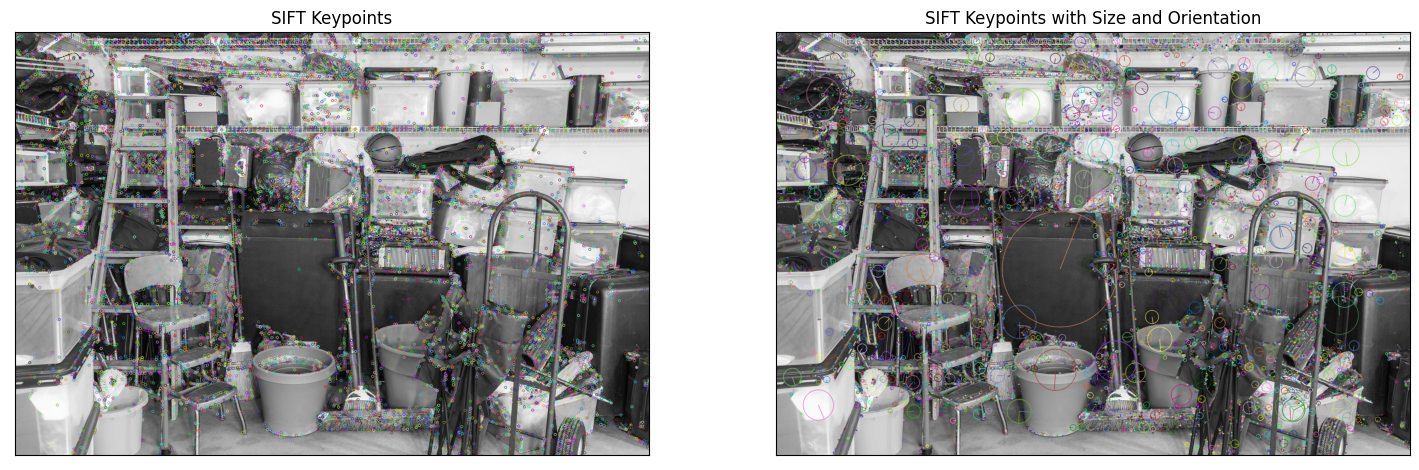

In [107]:
# Read in the query image (containing the object) in grayscale
img_query = cv.cvtColor(crop_ball, cv.COLOR_BGR2GRAY)

# Read in the train image (with the above object in it) in grayscale
img_train = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Create a SIFT detector object
sift = cv.SIFT_create()

# Find the SIFT keypoints and descriptors
# in the query and train images
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)

query = cv.drawKeypoints(img_query.copy(), kp_query, None)
query2 = cv.drawKeypoints(img_query.copy(), kp_query, None, flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
train = cv.drawKeypoints(img_train.copy(), kp_train, None)
train2 = cv.drawKeypoints(img_train.copy(), kp_train, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the image together with its keypoints
plt.figure(figsize=(18,18))
plt.subplot(121), plt.imshow(query[:,:,::-1]), plt.title('SIFT Object Keypoints'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(query2[:,:,::-1]), plt.title('SIFT object Keypoints with Size and Orientation'), plt.xticks([]), plt.yticks([])
plt.figure(figsize=(18,18))
plt.subplot(121), plt.imshow(train[:,:,::-1]), plt.title('SIFT Keypoints'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(train2[:,:,::-1]), plt.title('SIFT Keypoints with Size and Orientation'), plt.xticks([]), plt.yticks([])

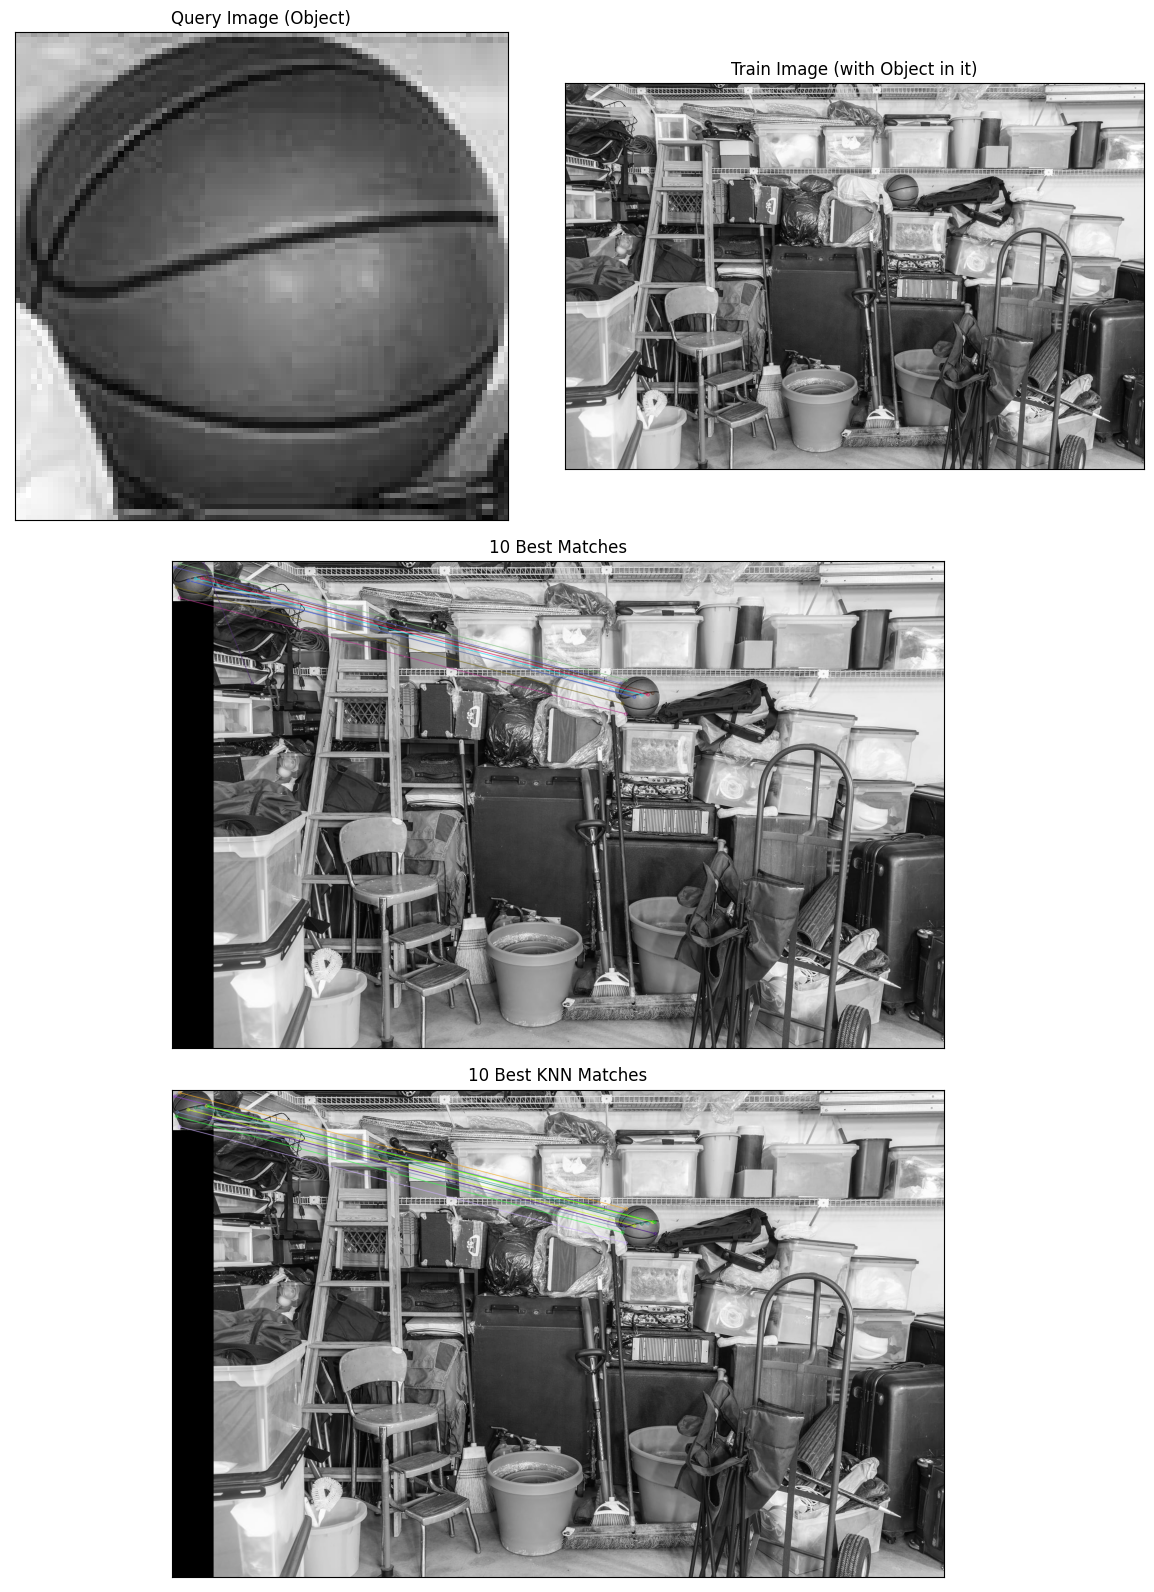

In [108]:
# Create a Brute Force Matcher (BFMatcher) object (with default parameters)
bf = cv.BFMatcher()

# Match the two descriptor sets (arrays) with each other,
# using the simple- and KNN matching algorithms
matches = bf.match(des_query, des_train)
knn_matches = bf.knnMatch(des_query, des_train, k=2)  # use k=2

# Sort the matches found by the simple matching
# algorithm in ascending order of distance
sorted_matches = sorted(matches, key=lambda x: x.distance)

# Apply a ratio test to the matches found by the KNN (k=2)
# matching algorithm. Here we only keep the closest match
# if it's less than 75% of the second closest match
# (in David Lowe's paper 80% was used as the threshold).
good_knn_matches = []
for m, n in knn_matches:
    if m.distance < 0.75*n.distance:
        good_knn_matches.append(m)

# Sort the matches found by the filtered KNN matching
# algorithm in ascending order of distance
sorted_good_knn_matches = sorted(good_knn_matches, key=lambda x: x.distance)

# Draw the first 10 matches found by the simple matching algorithm.
img_matches = cv.drawMatches(img_query, kp_query, img_train, kp_train, sorted_matches[:10], None,
                             flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Draw the first 10 matches found by the filtered KNN matching algorithm.
# Note: 'cv.drawMatchesKnn' expects a list of lists as matches.
sorted_good_knn_matches = [[m] for m in sorted_good_knn_matches]
img_matches_knn = cv.drawMatchesKnn(img_query, kp_query, img_train, kp_train, sorted_good_knn_matches[:20], None,
                                    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

img2 = cv.drawKeypoints(img.copy(), kp_query, None)
# Plot the query image and train image, together with
# the stacked images with added keypoints and matches
plt.figure(figsize=(12, 16))

plt.subplot(321), plt.imshow(img_query, cmap="gray"), plt.title(
    'Query Image (Object)'), plt.xticks([]), plt.yticks([])
plt.subplot(322), plt.imshow(img_train, cmap="gray"), plt.title(
    'Train Image (with Object in it)'), plt.xticks([]), plt.yticks([])
plt.subplot(312), plt.imshow(img_matches), plt.title(
    '10 Best Matches'), plt.xticks([]), plt.yticks([])
plt.subplot(313), plt.imshow(img_matches_knn), plt.title(
    '10 Best KNN Matches'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()
